## Project 3 - Reddit NLP Classification

# Contents:
- [1.0 Data Science Problem:](#Data-Science-Problem:)
- [1.1 Executive Summary:](#Executive-Summary:)
- [1.2 Importing libaries](#Importing-libraries) 
- [1.3 Scraping Reddit using pushshift api (https://github.com/pushshift/api)](#Scraping-Reddit-using-pushshift-api-(https://github.com/pushshift/api))
- [1.4 Combine `df` and `df1` to a single dataframe](#Combine-df-and-df1-to-a-single-dataframe) 
- [2. Explore Data (EDA)](#Explore-Data-(EDA))
- [2.1 Save dataframe to csv file](#Save-dataframe-to-csv-file)
- [2.2 Load csv file:](#Load-csv-file:)
- [3.0 EDA: cleaning data of new dataframe](#EDA:-cleaning-data-of-new-dataframe)
- [3.1 Generate Feature and target](#Generate-Feature-and-target)
- [4. Modeling: Conduct Train/Test split](#Modeling:-Conduct-Train/Test-split)
- [4.1 Using Pipeline and Gridsearch on models:](#Using-Pipeline-and-Gridsearch-on-models:)
- [4.2 Logistic Regression](#Logistic-Regression)
- [4.3 Random Forest](#Random-Forest)
- [5.0 Model Analysis:](#Model-Analysis:)
- [5.1 Logistic Regression using Tfidf Vectorizer](#Logistic-Regression-using-Tfidf-Vectorizer)
- [5.2 TFIDF Word Cloud](#TFIDF-Word-Cloud)
- [5.3 Create Confusion Matrix Function](#Create-Confusion-Matrix-Function)
- [5.4 Logistic Regression using Count Vectorizer](#Logistic-Regression-using-Count-Vectorizer)
- [5.5 Count Vectorizer Word Cloud](#Count-Vectorizer-Word-Cloud)
- [5.1 Random Forest Analysis](#Random-Forest-Analysis)
- [5.2 Ada Boost Analysis](#Ada-Boost-Analysis)
- [5.3 Conclusion](#Conclusion)

# Data Science Problem:
Using 2 Subreddits: `thanosdidnothingwrong` & `inthesoulstone` How can we scrape reddit data and use NLP classification to train a model that is able to differentiate between two subreddits.?

# Executive Summary:

Using the pushshift.api I scraped 20,000 posts from r/thanosdidnothing wrong(54%) 16983 posts from r/inthesoulstone(46%)

The 3 main models I focused on were Logistic Regression, Random Forest and Ada Boost
Typically for almost all of my models I achieved around an 66% accuracy score.
I typically used the same hyper parameters (n_gram range (1,2),lasso regularization
Count Vectorizer and Tfidf Vectorizer were also used in each model.

from my results I was able to predict 

Precision = 66%                Sensitivity = 50%
Specificity = 78%              Accuracy = 65%

the accuracy of the model is not extremely high, and when I tuned with hyper parameters my scores did not reflect much of change at all. 


# Importing Libraries:

In [376]:
# Web scraping libraries
import requests
import re
import time

# EDA libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
%matplotlib inline

# Sklearn libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Wordcloud
from wordcloud import WordCloud

# Remove future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

# Scraping Reddit using pushshift api (https://github.com/pushshift/api)

In [378]:
# create empty list for desired parameters
title = []
subreddit = []
upvotes = []
comments = []
subscribers = []
created_date = []
url = []
id = []

# create empty data frame of column names
df = pd.DataFrame()

# set after parameter to None (this is so we can start our scrape at a specific date in the for loop)
after = None
headers = {'User-agent': 'Alex'}

for a in range(20):                           # for loop to iterate through a range to 20
    print(f"Looping through page {a+1}")      # print a statement stating what page we are looping through
    if after == None:                         # if statement to check if loop needs to start from the beginning
        params = {                            # parameters that are necessary for scraping push shift api
        'subreddit': 'thanosdidnothingwrong',           
        'after': '1531195200',                # Start date to scrape data (Epoch date in CST Monday, July 9, 2018 11:00:00 PM)
        'size': 1000,                         # 20 loops of 1000 should give us 20,000 posts
        'score': '>0',                        # upvote score
        'num_comments': '>0'                  # number of comments
        }
    else:
        params = {
        'subreddit': 'thanosdidnothingwrong',
        'after': after,
        'size': 1000,
        'score': '>0',
        'num_comments': '>0'
        }
    link = 'https://api.pushshift.io/reddit/search/submission/'     # url to scrape push shift api
    res = requests.get(link, params=params, headers=headers)        # Get the json results based off of parameters

    if res.status_code == 200:                                      # if status code is a success continue through code
        the_json = res.json()
        for i in range(len(the_json['data'])):                      # Go through each loop that is in the json data
                    title.append(the_json['data'][i]['title'])      # append the empty lists with each desired parameter
                    subreddit.append(the_json['data'][i]['subreddit'])
                    comments.append(the_json['data'][i]['num_comments'])
                    upvotes.append(the_json['data'][i]['score'])
                    subscribers.append(the_json['data'][i]['subreddit_subscribers'])
                    created_date.append(the_json['data'][i]['created_utc'])
                    url.append(the_json['data'][i]['full_link'])
                    id.append(the_json['data'][i]['id'])
    else:
        print(res.status_code)
        break
    after = the_json['data'][i]['created_utc']     # make after equal the last posts epoch date so when the loop starts over it can start at this epoch date
    time.sleep(1)

# add the lists of each parameter to the df
df['title'] = title
df['subreddit'] = subreddit
df['comments'] = comments
df['upvotes'] = upvotes
df['subscribers'] = subscribers
df['created_date'] = created_date
df['url'] = url
df['id'] = id

Looping through page 1
Looping through page 2
Looping through page 3
Looping through page 4
Looping through page 5
Looping through page 6
Looping through page 7
Looping through page 8
Looping through page 9
Looping through page 10
Looping through page 11
Looping through page 12
Looping through page 13
Looping through page 14
Looping through page 15
Looping through page 16
Looping through page 17
Looping through page 18
Looping through page 19
Looping through page 20


In [379]:
title = []
subreddit = []
upvotes = []
comments = []
subscribers = []
created_date = []
url = []
id = []

df1 = pd.DataFrame() #columns = ['title', 'subreddit', 'comments', 'upvotes', 'subscribers', 'created_date', 'url', 'id'])

after = None

for a in range(17):
    print(f"Looping through page {a+1}")
    if after == None:
        params = {
        'subreddit': 'inthesoulstone',
        'after': '1531195200',
        'size': 1000,
        'score': '>0',
        'num_comments': '>0'
        }
    else:
        headers = {'User-agent': 'Alex'}
        params = {
        'subreddit': 'inthesoulstone',
        'after': after,
        'size': 1000,
        'score': '>0',
        'num_comments': '>0'
        }
    link = 'https://api.pushshift.io/reddit/search/submission/'
    res = requests.get(link, params=params, headers=headers)
    if res.status_code == 200:
        the_json = res.json()
        for i in range(len(the_json['data'])):
                    title.append(the_json['data'][i]['title'])
                    subreddit.append(the_json['data'][i]['subreddit'])
                    comments.append(the_json['data'][i]['num_comments'])
                    upvotes.append(the_json['data'][i]['score'])
                    subscribers.append(the_json['data'][i]['subreddit_subscribers'])
                    created_date.append(the_json['data'][i]['created_utc'])
                    url.append(the_json['data'][i]['full_link'])
                    id.append(the_json['data'][i]['id'])
    else:
        print(res.status_code)
        break
    after = the_json['data'][i]['created_utc']
    time.sleep(1)

df1['title'] = title
df1['subreddit'] = subreddit
df1['comments'] = comments
df1['upvotes'] = upvotes
df1['subscribers'] = subscribers
df1['created_date'] = created_date
df1['url'] = url
df1['id'] = id

Looping through page 1
Looping through page 2
Looping through page 3
Looping through page 4
Looping through page 5
Looping through page 6
Looping through page 7
Looping through page 8
Looping through page 9
Looping through page 10
Looping through page 11
Looping through page 12
Looping through page 13
Looping through page 14
Looping through page 15
Looping through page 16
Looping through page 17


# Combine df and df1 to a single dataframe

In [384]:
combined_data = pd.concat([df, df1],ignore_index=True)

In [385]:
# view first 5 rows of the combined dataframe
combined_data.head()

,title,subreddit,comments,upvotes,subscribers,created_date,url,id
0,For those who fell... for balance,thanosdidnothingwrong,1,2,638343,1531195214,https://www.reddit.com/r/thanosdidnothingwrong...,8xla5n
1,Join here if banned or spared.,thanosdidnothingwrong,3,1,638334,1531195219,https://www.reddit.com/r/thanosdidnothingwrong...,8xla6c
2,Wow.,thanosdidnothingwrong,4,1,638275,1531195240,https://www.reddit.com/r/thanosdidnothingwrong...,8xlaah
3,I lived?,thanosdidnothingwrong,6,1,638248,1531195248,https://www.reddit.com/r/thanosdidnothingwrong...,8xlac2
4,Test,thanosdidnothingwrong,1,1,638207,1531195265,https://www.reddit.com/r/thanosdidnothingwrong...,8xlafc


## Explore Data (EDA) 
View data to see if classes our balanced or not

In [386]:
# Total posts for each subreddit
combined_data['subreddit'].value_counts()

thanosdidnothingwrong    20000
inthesoulstone           17000
Name: subreddit, dtype: int64

In [392]:
# view classes
data['subreddit'].value_counts(normalize=True)

1    0.540789
0    0.459211
Name: subreddit, dtype: float64

In [388]:
# view if any post ids show duplicates
combined_data['id'].duplicated().sum()

0

In [390]:
# view the most popular posts with upvotes score > 1000
combined_data[combined_data['upvotes'] > 1000].head()

,title,subreddit,comments,upvotes,subscribers,created_date,url,id
412,The time is passed.,thanosdidnothingwrong,765,12900,633098,1531197435,https://www.reddit.com/r/thanosdidnothingwrong...,8xlkku
1475,"If this gets 10K points, I'll send one to each...",thanosdidnothingwrong,4646,64600,614503,1531210373,https://www.reddit.com/r/thanosdidnothingwrong...,8xmw44
1683,When you see there are still 600k subs after t...,thanosdidnothingwrong,1752,15834,611085,1531215628,https://www.reddit.com/r/thanosdidnothingwrong...,8xng0d
1908,PETITION for badge for survivors and the snapped.,thanosdidnothingwrong,4633,40452,608167,1531221222,https://www.reddit.com/r/thanosdidnothingwrong...,8xo1wb
1979,Petition to make /r/thanosdidnothingwrong a fa...,thanosdidnothingwrong,116,4860,607262,1531222805,https://www.reddit.com/r/thanosdidnothingwrong...,8xo8fj


## Save dataframe to csv file

In [11]:
#combined_data.to_csv('./data/combined_data.csv')

## Load csv file:
- drop `Unnamed:0` column

In [358]:
data = pd.read_csv('./data/combined_data.csv')
data.drop('Unnamed: 0',axis=1, inplace=True) #drop first column Unnamed: 0

In [359]:
# view first 5 rows of new dataframe
data.head()

,title,subreddit,comments,upvotes,subscribers,created_date,url,id
0,For those who fell... for balance,thanosdidnothingwrong,1,2,638343,1531195214,https://www.reddit.com/r/thanosdidnothingwrong...,8xla5n
1,Join here if banned or spared.,thanosdidnothingwrong,3,1,638334,1531195219,https://www.reddit.com/r/thanosdidnothingwrong...,8xla6c
2,Wow.,thanosdidnothingwrong,4,1,638275,1531195240,https://www.reddit.com/r/thanosdidnothingwrong...,8xlaah
3,I lived?,thanosdidnothingwrong,6,1,638248,1531195248,https://www.reddit.com/r/thanosdidnothingwrong...,8xlac2
4,Test,thanosdidnothingwrong,1,1,638207,1531195265,https://www.reddit.com/r/thanosdidnothingwrong...,8xlafc


In [360]:
# view shape
data.shape

(36983, 8)

In [361]:
# make sure classes are still the same
data['subreddit'].value_counts(normalize=True)

thanosdidnothingwrong    0.540789
inthesoulstone           0.459211
Name: subreddit, dtype: float64

## EDA: cleaning data of new dataframe
Use get dummies on `subreddit`
- 1 = thanos did nothing wrong
- 0 = in the soulstone

In [362]:
# get dummies on subreddit column to covert to 0 and 1
data.subreddit = pd.get_dummies(data.subreddit,drop_first=True)

In [363]:
#view first 5 rows of data with binarized subreddit column
data.head()

,title,subreddit,comments,upvotes,subscribers,created_date,url,id
0,For those who fell... for balance,1,1,2,638343,1531195214,https://www.reddit.com/r/thanosdidnothingwrong...,8xla5n
1,Join here if banned or spared.,1,3,1,638334,1531195219,https://www.reddit.com/r/thanosdidnothingwrong...,8xla6c
2,Wow.,1,4,1,638275,1531195240,https://www.reddit.com/r/thanosdidnothingwrong...,8xlaah
3,I lived?,1,6,1,638248,1531195248,https://www.reddit.com/r/thanosdidnothingwrong...,8xlac2
4,Test,1,1,1,638207,1531195265,https://www.reddit.com/r/thanosdidnothingwrong...,8xlafc


## Generate Feature and target

In [364]:
X = data['title'] #feature
y = data['subreddit'] #target

# Modeling: Conduct Train/Test split

In [365]:
# Create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state =42, stratify=y)

# Using Pipeline and Gridsearch on models:
- TfidfVectorizer
- Count Vectorizer

- Logistic Regression
- Random Forest
- Bagging Classifier
- Ada Boost

## Logistic Regression
- with `CountVectorizer`

In [393]:
log_vect_pipe = Pipeline([                # set up pipeline
    ('vect', CountVectorizer()),          # use Count Vectorizer()
    ('log_reg', LogisticRegression())     # Logistic Regression model
])

log_vect_params = {                                # select parameters
    'vect__ngram_range': [(1, 2)],                 # view words
    'vect__stop_words': [None, 'english'],         # potentially exclude common stop words
    'vect__strip_accents': ['ascii', 'unicode'],
    'log_reg__penalty': ['l1', 'l2'],              # try lasso and ridge regularization
    'log_reg__C': [.001, .01, 1, 10]               # try different regularization strengths
}

log_vect_gs = GridSearchCV(log_vect_pipe, log_vect_params, verbose=2, cv=5, n_jobs=-1)  # gridsearch

log_vect_gs.fit(X_train, y_train)               # fit the model

log_vect_y_preds = log_vect_gs.predict(X_test)  # generate predictions

print(log_vect_gs.best_score_)                  # print score
print(accuracy_score(y_test, log_vect_y_preds)) # print accuracy
log_vect_gs.best_params_                        # print best parameters from grid search

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  2.3min finished


0.6573976915005246
0.6571896763621466


{'log_reg__C': 1,
 'log_reg__penalty': 'l1',
 'vect__ngram_range': (1, 2),
 'vect__stop_words': None,
 'vect__strip_accents': 'unicode'}

## Logistic Regression
- with `TFIDF Vectorizer`

In [205]:
log_tfidf_pipe = Pipeline([                 # set up pipeline
    ('tfidf', TfidfVectorizer()),           # use TFIDF Vectorizer()
    ('log_reg', LogisticRegression())       # use Logistic Regression model
])

log_tfidf_params = {                              # specify parameters to be used in gridsearch
    'tfidf__ngram_range': [(1,1)],                # view words
    'tfidf__stop_words': [None, 'english'],       # potentially exclude common stop words
    'tfidf__strip_accents': ['ascii', 'unicode'], 
    'log_reg__penalty': ['l1', 'l2'],             # try lasso and ridge regularization
    'log_reg__C': [.001, .01, 1, 10]              # try different regularization strengths
}

log_tfidf_gs = GridSearchCV(log_tfidf_pipe, log_tfidf_params, verbose=2, cv=5, n_jobs=-1)      # gridsearch

log_tfidf_gs.fit(X_train, y_train)                # fit the model

log_tfidf_y_preds = log_tfidf_gs.predict(X_test)  # generate predictions

print(log_tfidf_gs.best_score_)                    # print score
print(accuracy_score(y_test, log_tfidf_y_preds))   # print accuracy
log_tfidf_gs.best_params_                          # print best parameters from grid search

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.1min finished
/Users/alexnguyen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6557026394382113
0.6514543219991806


{'log_reg__C': 1,
 'log_reg__penalty': 'l2',
 'tfidf__ngram_range': (1, 1),
 'tfidf__stop_words': None,
 'tfidf__strip_accents': 'unicode'}

# Random Forest Analysis
- with `CountVectorizer`

In [204]:
rf_vect_pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

rf_vect_params = {
    'vect__ngram_range': [(1, 1)],
    'vect__stop_words': [None],
    'vect__min_df': [1],
    'rf__n_estimators':[150, 200, 300],
    'rf__max_depth':[50, 75, 100]
}

rf_vect_gs = GridSearchCV(rf_vect_pipe, rf_vect_params, verbose=2, cv=5, n_jobs=3)

rf_vect_gs.fit(X_train, y_train)

rf_vect_y_preds = rf_vect_gs.predict(X_test)

print(rf_vect_gs.best_score_)
print(accuracy_score(y_test, rf_vect_y_preds))
rf_vect_gs.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  5.0min
[Parallel(n_jobs=3)]: Done  45 out of  45 | elapsed:  7.3min finished


0.6671644200500444
0.6621056943875461


{'rf__max_depth': 100,
 'rf__n_estimators': 200,
 'vect__min_df': 1,
 'vect__ngram_range': (1, 1),
 'vect__stop_words': None}

# Ada Boost Analysis
- with `CountVectorizer`

In [86]:
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('ada', AdaBoostClassifier())
])

params = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'vect__stop_words': [None, 'english'],
    'ada__base_estimator': [DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    'ada__n_estimators': [50, 100]
}

gs = GridSearchCV(pipe, params, verbose=2, cv=5, n_jobs=-1)

gs.fit(X_train, y_train)

y_preds = gs.predict(X_test)

print(gs.best_score_)
print(accuracy_score(y_test, y_preds))
gs.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  4.0min finished


0.6548147550246186
0.6551413355182303


{'ada__base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'),
 'ada__n_estimators': 100,
 'vect__ngram_range': (1, 2),
 'vect__stop_words': None}

# Model Analysis:
- `Logistic Regression`
- `Random Forest`
- `Ada boost`

 Gradient Boosting had an accuracy score of 64.98%

## Logistic Regression using Tfidf Vectorizer

In [395]:
tfidf = TfidfVectorizer(ngram_range=(1,1),stop_words=None,analyzer='word',strip_accents='unicode',)
tfidf_train = tfidf.fit_transform(X_train)
tfidf_test = tfidf.transform(X_test)

tfidf_train_df = pd.DataFrame(tfidf_train.todense(), columns=tfidf.get_feature_names())
tfidf_test_df = pd.DataFrame(tfidf_test.todense(), columns=tfidf.get_feature_names())

print(f"Tfid Vectorizertrain shape is {tfidf_train_df.shape}")
print(f"Tfid Vectorizer test shape is {tfidf_test_df.shape}")


Tfid Vectorizertrain shape is (24778, 11055)
Tfid Vectorizer test shape is (12205, 11055)


In [396]:
lr = LogisticRegression(C=1, penalty ='l2')
lr.fit(tfidf_train, y_train)

lr_train_score = lr.score(tfidf_train_df, y_train)
lr_test_score = lr.score(tfidf_test_df, y_test)

predictions = lr.predict(tfidf_test_df)                           #generate predictions

print(f" Logistic Regression score on training data is {np.round(lr_train_score,4)}")
print(f" Logistic Regression score on testing data is {np.round(lr_test_score,4)}")

 Logistic Regression score on training data is 0.747
 Logistic Regression score on testing data is 0.6515


## TFIDF Word Cloud

In [403]:
tfidf_wc= pd.DataFrame(lr.coef_, columns=tfidf.get_feature_names()).T
tfidf_all_pos_df = tfidf_wc[tfidf_wc[0] <= 0]
tfidf_all_neg_df = wc_df[wc_df[0] <= 0]

In [404]:
tfidf_all_pos_df = tfidf_all_pos_df[0].map(lambda x:x**2)
tfidf_wordcloud_dict = tfidf_all_pos_df.to_dict()
tfidf_wordcloud_dict

{'0005lbs': 0.016647700321876947,
 '001': 0.0033577019384484832,
 '00pm': 0.024485816864770225,
 '045': 0.048902815480207175,
 '06': 0.11287784237278996,
 '09': 0.009764225319029799,
 '10': 0.06561955865652665,
 '100': 0.4174856575773656,
 '1000': 0.6050279499878127,
 '1000000k': 0.015822432923060115,
 '100000iq': 0.03371303594090582,
 '100291': 0.23246561384212533,
 '101': 0.1134562352088544,
 '102': 0.004763976787673364,
 '103': 0.008062603739837127,
 '105': 0.008217060886949618,
 '106': 0.0082697956581919,
 '107': 0.0037328501097505734,
 '108': 0.001081159754748523,
 '1080p': 0.18006995002657636,
 '109': 0.09503961868194945,
 '10s': 0.1997684634625628,
 '110': 0.10227635006317776,
 '111': 0.09454998869941734,
 '111881': 0.011697088031864237,
 '112': 0.008448994298756453,
 '113': 0.008062603739837127,
 '114': 0.00900498187434906,
 '114411': 0.02340955568355228,
 '114816': 0.009075284090857111,
 '115': 0.004763976787673364,
 '115630': 0.1100844618051433,
 '117': 0.004763976787673364,


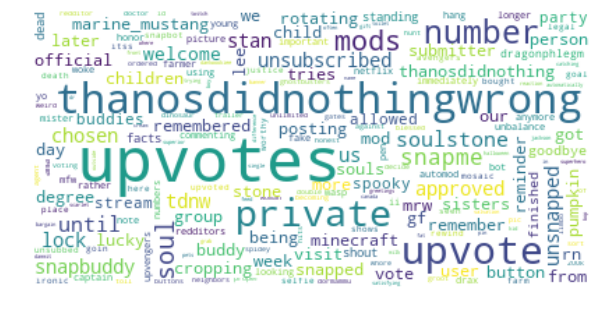

In [405]:
wc = WordCloud(background_color='white').generate_from_frequencies(tfidf_wordcloud_dict)

# Display the generated image:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

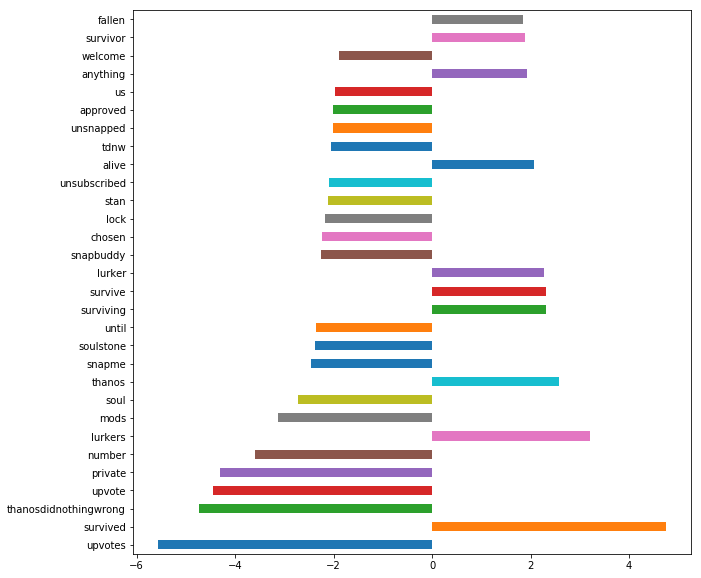

In [402]:
# view coefficients
coef_df = pd.DataFrame(lr.coef_, columns=tfidf.get_feature_names()).T
coef_df['Absolute'] = coef_df[0].abs()
coef_df.sort_values('Absolute', ascending=False).head(30)[0].plot(kind='barh',figsize=(10,10));

## Create Confusion Matrix Function

In [155]:
def make_nice_conmat(y_test, preds):

    cmat = confusion_matrix(y_test, preds)
    print(f'Accuracy: {accuracy_score(y_test, preds)}')
    print(classification_report(y_test, preds))
    return pd.DataFrame(cmat, columns=['Predicted ' + str(i) for i in ['inthesoulstone', 'thanosdidnothingwrong']],\
            index=['Actual ' + str(i) for i in ['inthesoulstone', 'thanosdidnothingwrong']])

make_nice_conmat(y_test, predictions)

Accuracy: 0.6514543219991806
              precision    recall  f1-score   support

           0       0.65      0.52      0.58      5605
           1       0.65      0.77      0.70      6600

   micro avg       0.65      0.65      0.65     12205
   macro avg       0.65      0.64      0.64     12205
weighted avg       0.65      0.65      0.65     12205



,Predicted inthesoulstone,Predicted thanosdidnothingwrong
Actual inthesoulstone,2895,2710
Actual thanosdidnothingwrong,1544,5056


# Logistic Regression using Count Vectorizer

In [407]:
cv = CountVectorizer(min_df=1, ngram_range=(1,2), stop_words=None, strip_accents='unicode')
cv_train = cv.fit_transform(X_train)
cv_test = cv.transform(X_test)

cv_train_df = pd.DataFrame(cv_train.todense(), columns=cv.get_feature_names())
cv_test_df = pd.DataFrame(cv_test.todense(), columns=cv.get_feature_names())

print(f"Count Vectorizer train shape is {cv_train_df.shape}")
print(f"Count Vectorizer test shape is {cv_test_df.shape}")

Count Vectorizer train shape is (24778, 76691)
Count Vectorizer test shape is (12205, 76691)


In [408]:
lr = LogisticRegression(C=1, penalty ='l1')
lr.fit(cv_train, y_train)

lr_train_score = lr.score(cv_train_df, y_train)
lr_test_score = lr.score(cv_test_df, y_test)

predictions = lr.predict(cv_test_df)             #generate predictions

print(f" Logistic Regression score on training data is {np.round(lr_train_score,4)}")
print(f" Logistic Regression score on testing data is {np.round(lr_test_score,4)}")

 Logistic Regression score on training data is 0.7871
 Logistic Regression score on testing data is 0.6572


# Count Vectorizer Word Cloud


In [409]:
wc_df = pd.DataFrame(lr.coef_, columns=cv.get_feature_names()).T
all_pos_df = wc_df[wc_df[0] >= 0]
all_neg_df = wc_df[wc_df[0] <= 0]

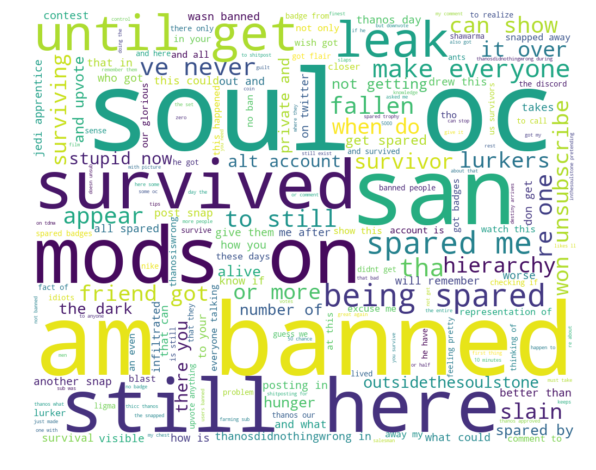

In [410]:
# thanosdidnothingwrong
#all _positive
all_pos_df = all_pos_df[0].map(lambda x:x**2)
wordcloud_dict = all_pos_df.to_dict()

wc = WordCloud(width=1000,height=800, background_color='white').generate_from_frequencies(wordcloud_dict)

# Display the generated image:
plt.figure(figsize=(10,8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

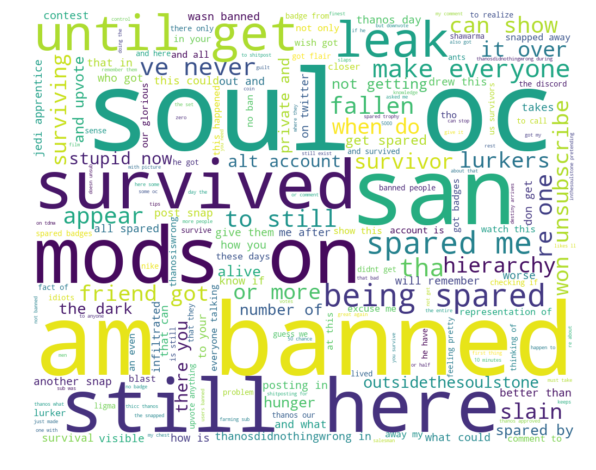

In [411]:
# inthesoulstone
all_neg_df = all_neg_df[0].map(lambda x:x**2)
wordcloud_dict = all_neg_df.to_dict()
wordcloud_dict['upvotes'] = 0

all_neg_wc = WordCloud(width=1000, height=800, background_color='white').generate_from_frequencies(wordcloud_dict)

# Display the generated image:
plt.figure(figsize=(10,8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

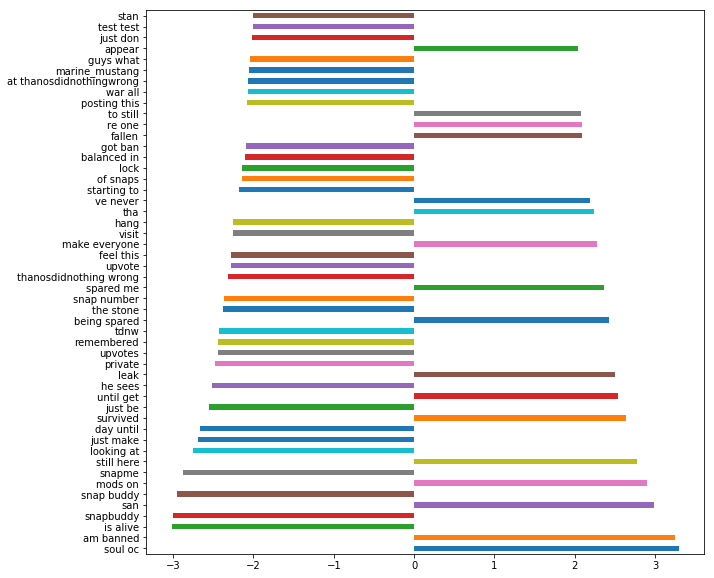

In [412]:
coef_df = pd.DataFrame(lr.coef_, columns=cv.get_feature_names()).T
coef_df['Absolute'] = coef_df[0].abs()
coef_df.sort_values('Absolute', ascending=False).head(50)[0].plot(kind='barh',figsize=(10,10));

In [413]:
make_nice_conmat(y_test, predictions)

Accuracy: 0.6571896763621466
              precision    recall  f1-score   support

           0       0.67      0.51      0.58      5605
           1       0.65      0.78      0.71      6600

   micro avg       0.66      0.66      0.66     12205
   macro avg       0.66      0.65      0.64     12205
weighted avg       0.66      0.66      0.65     12205



,Predicted inthesoulstone,Predicted thanosdidnothingwrong
Actual inthesoulstone,2851,2754
Actual thanosdidnothingwrong,1430,5170


# Random Forest
- with `CountVectorizer`

In [49]:
cv = CountVectorizer(min_df=1, ngram_range=(1,1), stop_words=None)
cv_train = cv.fit_transform(X_train)
cv_test = cv.transform(X_test)

cv_train_df = pd.DataFrame(cv_train.todense(), columns=cv.get_feature_names())
cv_test_df = pd.DataFrame(cv_test.todense(), columns=cv.get_feature_names())

print(f"Count Vectorizer train shape is {cv_train_df.shape}")
print(f"Count Vectorizer test shape is {cv_test_df.shape}")

Count Vectorizer train shape is (24778, 11059)
Count Vectorizer test shape is (12205, 11059)


In [153]:
rf = RandomForestClassifier(max_depth= 50, n_estimators= 100,)
rf.fit(cv_train, y_train)

rf_train_score = rf.score(cv_train_df, y_train)
rf_test_score = rf.score(cv_test_df, y_test)

rf_predictions = rf.predict(cv_test_df)                           #generate predictions

print(f" Random Forest score on training data is {np.round(rf_train_score,4)}")
print(f" Random Forest score on testing data is {np.round(rf_test_score,4)}")

 Random Forest score on training data is 0.7699
 Random Forest score on testing data is 0.6578


In [149]:
make_nice_conmat(y_test, rf_predictions)

Accuracy: 0.6196640721015977
              precision    recall  f1-score   support

           0       0.83      0.21      0.34      5605
           1       0.59      0.96      0.73      6600

   micro avg       0.62      0.62      0.62     12205
   macro avg       0.71      0.59      0.54     12205
weighted avg       0.70      0.62      0.55     12205



,Predicted inthesoulstone,Predicted thanosdidnothingwrong
Actual inthesoulstone,1203,4402
Actual thanosdidnothingwrong,240,6360


# Ada Boost
- with `CountVectorizer`

In [36]:
cv = CountVectorizer(min_df=1, ngram_range=(1,1), stop_words=None)
cv_train = cv.fit_transform(X_train)
cv_test = cv.transform(X_test)

cv_train_df = pd.DataFrame(cv_train.todense(), columns=cv.get_feature_names())
cv_test_df = pd.DataFrame(cv_test.todense(), columns=cv.get_feature_names())

print(f"Count Vectorizer train shape is {cv_train_df.shape}")
print(f"Count Vectorizer test shape is {cv_test_df.shape}")

Count Vectorizer train shape is (24778, 11059)
Count Vectorizer test shape is (12205, 11059)


In [25]:
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(cv_train,y_train)

ada_train_score = ada.score(cv_train_df, y_train)
ada_test_score = ada.score(cv_test_df, y_test)

predictions = ada.predict(cv_test_df)                           #generate predictions

print(f" Ada Boost score on training data is {np.round(ada_train_score,4)}")
print(f" Ada Boost score on testing data is {np.round(ada_test_score,4)}")

 Ada Boost score on training data is 0.6578
 Ada Boost score on testing data is 0.6471


# Conclusion
- Given more time I would be interested in diving into the text to apply NLTK. Upon reviewing the word clouds, I found that there were alot of words that could have been stemmed down to their base words (ex: survived, survives, surviving, upvotes, upvote, etc.)

- These two subreddits are very similar. Both are focused on the Marvel universe, a  lot of the posts are memes!

- Also I believe looking at different timeframes for the data being used heavily impacts these subreddits